**Library Imports**

## Bernoulli Naive Bayes Modeling and Metrics With TF-IDF Vectorier
---

## Contents
---
- [Library and Data Imports](#Library-and-Data-Imports)
- [Train Test Split and Base Model](#Train-Test-Split-and-Base-Model)
- [Bernoulli Naive Bayes with CountVectorizer](#Bernoulli-Naive-Bayes-with-CountVectorizer)
- [Predictions and Interpretation](#Predictions-and-Interpretation)|
- [Confusion Matrix Interpretation](#Confusion-Matrix-Interpretation)

## Library and Data Imports
___

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay,accuracy_score,
    roc_auc_score, recall_score,
    precision_score, f1_score, classification_report, RocCurveDisplay)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB

from matplotlib.ticker import FuncFormatter

**Read in text_processed_corpus.csv**

In [2]:
text_processed_corpus = pd.read_csv('./data/text_processed_corpus.csv')

## Train Test Split and Base Model
___

In [3]:
#Train Test Split
X = text_processed_corpus['processed_text']
y = text_processed_corpus['subreddit']

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    stratify = y,
                                                    random_state = 24)
                                                    
    

**What is the base model?**
* There is a **56%** chance of correctly predicting a post belongs in the fountainpens reddit.

In [4]:
y.value_counts(normalize = True) * 100

subreddit
1    55.615165
0    44.384835
Name: proportion, dtype: float64

In [5]:
#Ensuring that stratify is maintaining the slight skew between the two subreddit
y_train.value_counts(normalize = True), y_test.value_counts(normalize = True)

(subreddit
 1    0.556032
 0    0.443968
 Name: proportion, dtype: float64,
 subreddit
 1    0.556509
 0    0.443491
 Name: proportion, dtype: float64)

In [6]:
# Summon the vectorizers and estimators
cvec = CountVectorizer()
logreg = LogisticRegression()

## Bernoulli Naive Bayes with CountVectorizer
___
In this project, I will use Bernoulli Naive Bayes as it is ideal to classify variables of 0 and 1.  This perfectly suits our problem of which subreddit posts belong.

In [7]:
# Build a pipeline
pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('bb', BernoulliNB())
])

In [8]:
# Checking an initial score without actually fitting anything.
cross_val_score(pipe, X_train, y_train, cv=3).mean()

0.8655221745350502

A variety of wide ranges were set for each parameter.  Several interations were run until each parameter range was narrowed down to the best ones.

Each range would start with 3 or 4 variables and be adjusted depending if values preferred higher or lower variables.

In [9]:
# Create parameters for a gridsearch over to see what performs best -  Started with2100 total models not including cv.
# Varied parameters until ideal parameters were determined.
pipe_params = {
    'bb__alpha':[0.75],
    'cvec__max_features': [2000],
    'cvec__min_df': [3],
    'cvec__max_df': [0.7],
    'cvec__ngram_range': [(1,3)]
}

In [10]:
#GridSearch set-up
gs = GridSearchCV(pipe,
                  pipe_params,
                  cv = 5)

In [11]:
#GridSearch the training data.

gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('bb', BernoulliNB())]),
             param_grid={'bb__alpha': [0.75], 'cvec__max_df': [0.7],
                         'cvec__max_features': [2000], 'cvec__min_df': [3],
                         'cvec__ngram_range': [(1, 3)]})

In [12]:
#What was the best score?
print(f'The best accuracy score in all models tested in grid search is {round(gs.best_score_,2) * 100}%')

The best accuracy score in all models tested in grid search is 87.0%


In [13]:
# Breakdown of the parameters chosen to make the best model.
gs.best_params_

{'bb__alpha': 0.75,
 'cvec__max_df': 0.7,
 'cvec__max_features': 2000,
 'cvec__min_df': 3,
 'cvec__ngram_range': (1, 3)}

## Predictions and Interpretation
___

Results - Model resulted in 90% for both the training and testing accuracy score which is the best of any attempted model.  Testing and training accuracy were both at 90%  The prediction accurary is 90%

#### Predictions

In [14]:
#Training set results
print(f'Training accuracy score is at {round(gs.score(X_train, y_train),2) * 100}%')

Training accuracy score is at 90.0%


In [15]:
# Testing set results - Null model is at 56%
print(f'Testing accuracy score is at {round(gs.score(X_test, y_test),2) * 100}%')

Testing accuracy score is at 90.0%


In [16]:
# The next two slides show how the model predicts (fountainpens = 1 and pens = 0) and the probability for each row value.
# First 20 samples are shown.
pred = gs.predict(X_test)
pred[:20]

array([1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [17]:
gs.predict_proba(X_test)[:20]

array([[4.20908061e-01, 5.79091939e-01],
       [1.92679595e-02, 9.80732040e-01],
       [9.48873183e-04, 9.99051127e-01],
       [3.06938266e-03, 9.96930617e-01],
       [9.94608435e-01, 5.39156549e-03],
       [2.42965308e-02, 9.75703469e-01],
       [5.26356124e-01, 4.73643876e-01],
       [8.54828732e-02, 9.14517127e-01],
       [8.83872464e-02, 9.11612754e-01],
       [2.38316065e-03, 9.97616839e-01],
       [6.67558329e-17, 1.00000000e+00],
       [1.55384710e-05, 9.99984462e-01],
       [6.05319015e-08, 9.99999939e-01],
       [4.77592382e-01, 5.22407618e-01],
       [2.52244960e-09, 9.99999997e-01],
       [2.03433116e-01, 7.96566884e-01],
       [8.47798095e-04, 9.99152202e-01],
       [1.27468284e-07, 9.99999873e-01],
       [2.43374708e-01, 7.56625292e-01],
       [3.83640704e-03, 9.96163593e-01]])

In [18]:
# Accuracy Score - What precentage of total predictions were correct?
print(f'This model has an accuracy score of {round(metrics.accuracy_score(y_test, pred) * 100,2)}%')

This model has an accuracy score of 89.7%


## Confusion Matrix Interpretation
___
In this scenerio, I would ideally prefer to never incorrectly classify a pen subreddit post as a fountainpens post.  Pens are a more general topic and talking about fountain pens would be acceptable.  It's safe to assume people browsing the fountainpens subreddit are only interested in fountain pens.<br><br>
Essentially I want to mimimize false positives.  **The specificity score is ~91%** and this is the only model that handles false negatives better than false positives.<br>

In [19]:
#Create a confusion matrix array
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()

print(tn, fp, fn, tp)

283 27 45 344


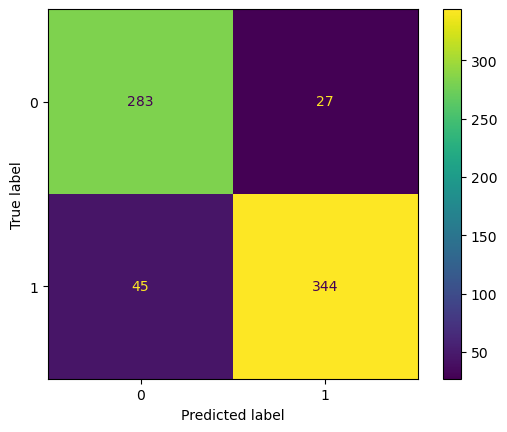

In [20]:
#Create a confusion matrix
#Create a confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, pred),
                             display_labels=gs.classes_)

disp.plot()
plt.savefig('../project-3/plot_images/bernoulli_nb_cvec_confusion_matrix.png', dpi = 192);

In [21]:
# How sensitive is this model? ~88%
metrics.recall_score(y_test, pred)

0.884318766066838

In [22]:
# What is the specificity of the model?  - I care about this metric more and this is the best performing model for
# this metric.  Best score of all models at ~91%
tn / (tn + fp)

0.9129032258064517

In [23]:
# Recall is the same as sensitivity ~88%
metrics.recall_score(y_test, pred)

0.884318766066838

In [24]:
# Precision score.  How many were correctly predicted to go in the fountainpens reddit?
metrics.precision_score(y_test, pred)

0.9272237196765498

<Figure size 2000x800 with 0 Axes>

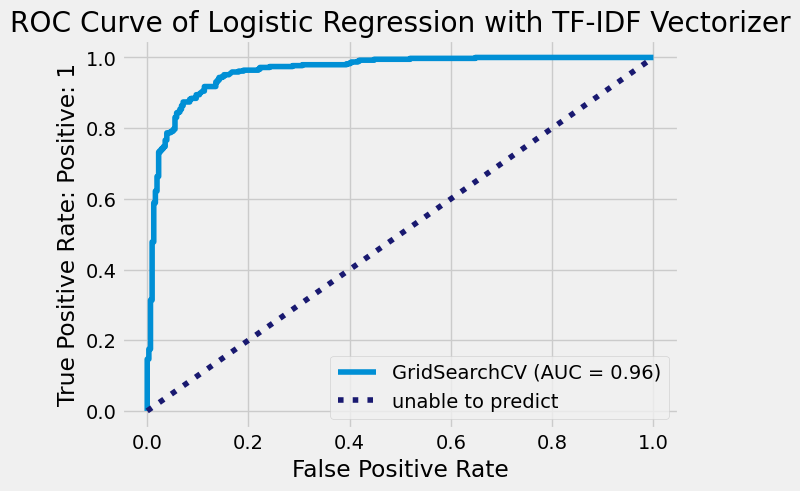

In [25]:
plt.figure(figsize = (20,8))
plt.style.use("fivethirtyeight")
plt.tight_layout()

RocCurveDisplay.from_estimator(gs, X_test, y_test)

# The 50/50 line
plt.plot([0,1], [0,1],
         label = 'unable to predict',
         linestyle = 'dotted',
         color = 'midnightblue');

# Legend
plt.legend()
plt.title('ROC Curve of Logistic Regression with TF-IDF Vectorizer')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate: Positive: 1');

In [26]:
#F1 Score - Unsure if this is meaningful because the classes weren't very unbalanced.
f1_score(y_test, pred)

0.9052631578947368

I continued to explore this model a bit more because it did the best with specificity.  It appears that no matter when I set the threshold, there will always be some misclassified values.  There is overlap throughout the chart below.  Increasing the threshold would increase specificity, but I don't want to drop accuracy.

In [27]:
pred_df = pd.DataFrame(
    gs.predict_proba(X_test),
    columns=['pens', 'fountainpens'])

pred_df['true_values'] = y_test.values

pred_df.head()

,pens,fountainpens,true_values
0,0.420908,0.579092,1
1,0.019268,0.980732,1
2,0.000949,0.999051,1
3,0.003069,0.996931,1
4,0.994608,0.005392,0


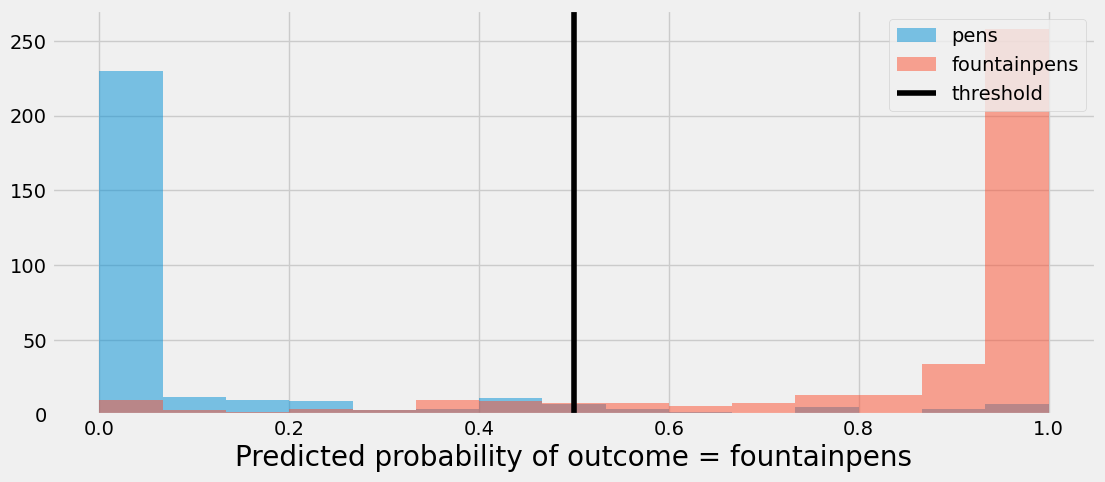

In [28]:
plt.figure(figsize=(12,5))
plt.tight_layout()

alive_subset = pred_df[pred_df['true_values'] == 0]
plt.hist(alive_subset['fountainpens'], label='pens', bins=15, alpha=.5)

dead_subset = pred_df[pred_df['true_values'] == 1]
plt.hist(dead_subset['fountainpens'], label='fountainpens', bins=15, alpha=.5)

plt.axvline(.5, color='black', linestyle='-', label='threshold')
plt.xlabel('Predicted probability of outcome = fountainpens', size = 20)

plt.legend();